
# **Import and download the dataset from web**




In [93]:
import kagglehub

dataset = kagglehub.dataset_download('ashishsaxena2209/animal-image-datasetdog-cat-and-panda')

print('Dataset downloaded successfully from web.')


Dataset downloaded successfully from web.


# Dataset loading and preprocessing

In [94]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [95]:
print(os.listdir(dataset))

['animals', 'images']


In [96]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['animals', 'images', 'dogs', 'panda', 'cats']


In [97]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['dogs', 'panda', 'cats']


In [98]:
categories = os.listdir(dataset)
print(categories)

['dogs', 'panda', 'cats']


In [99]:

result = []
for category in categories:
    path = os.path.join(dataset, category)
    files = os.listdir(path)
    result.append(files)

print(result)





[['dogs_00583.jpg', 'dogs_00683.jpg', 'dogs_00750.jpg', 'dogs_00652.jpg', 'dogs_00895.jpg', 'dogs_00686.jpg', 'dogs_00622.jpg', 'dogs_00291.jpg', 'dogs_00944.jpg', 'dogs_00082.jpg', 'dogs_00955.jpg', 'dogs_00309.jpg', 'dogs_00253.jpg', 'dogs_00416.jpg', 'dogs_00646.jpg', 'dogs_00463.jpg', 'dogs_00688.jpg', 'dogs_00732.jpg', 'dogs_00137.jpg', 'dogs_00602.jpg', 'dogs_00647.jpg', 'dogs_00976.jpg', 'dogs_00636.jpg', 'dogs_00226.jpg', 'dogs_00359.jpg', 'dogs_00684.jpg', 'dogs_00370.jpg', 'dogs_00676.jpg', 'dogs_00500.jpg', 'dogs_00716.jpg', 'dogs_00294.jpg', 'dogs_00041.jpg', 'dogs_00544.jpg', 'dogs_00124.jpg', 'dogs_00429.jpg', 'dogs_00279.jpg', 'dogs_00821.jpg', 'dogs_00957.jpg', 'dogs_00846.jpg', 'dogs_00843.jpg', 'dogs_00391.jpg', 'dogs_00519.jpg', 'dogs_00452.jpg', 'dogs_00618.jpg', 'dogs_00875.jpg', 'dogs_00381.jpg', 'dogs_00692.jpg', 'dogs_00917.jpg', 'dogs_00167.jpg', 'dogs_00122.jpg', 'dogs_00473.jpg', 'dogs_00625.jpg', 'dogs_00753.jpg', 'dogs_00835.jpg', 'dogs_00660.jpg', 'dogs_00

Taking the First 100 images from each category

In [100]:
train_data = []
max_images_per_class = 100

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)

    image_files = os.listdir(path)[:max_images_per_class]

    for img in tqdm(image_files, desc=f"Loading {category}"):
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)

        if img_bgr is None:
            continue

        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_array = cv2.resize(img_gray, (32, 32))
        train_data.append((img_array, label))



Loading cats: 100%|██████████| 100/100 [00:00<00:00, 483.69it/s]


In [101]:
print(f"Total loaded samples: {len(train_data)}")

Total loaded samples: 300


In [102]:
print([train_data[i][1] for i in range(10)])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [103]:
np.random.shuffle(train_data)

In [104]:
print([train_data[i][1] for i in range(15)])

[2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 2]


# Visualization

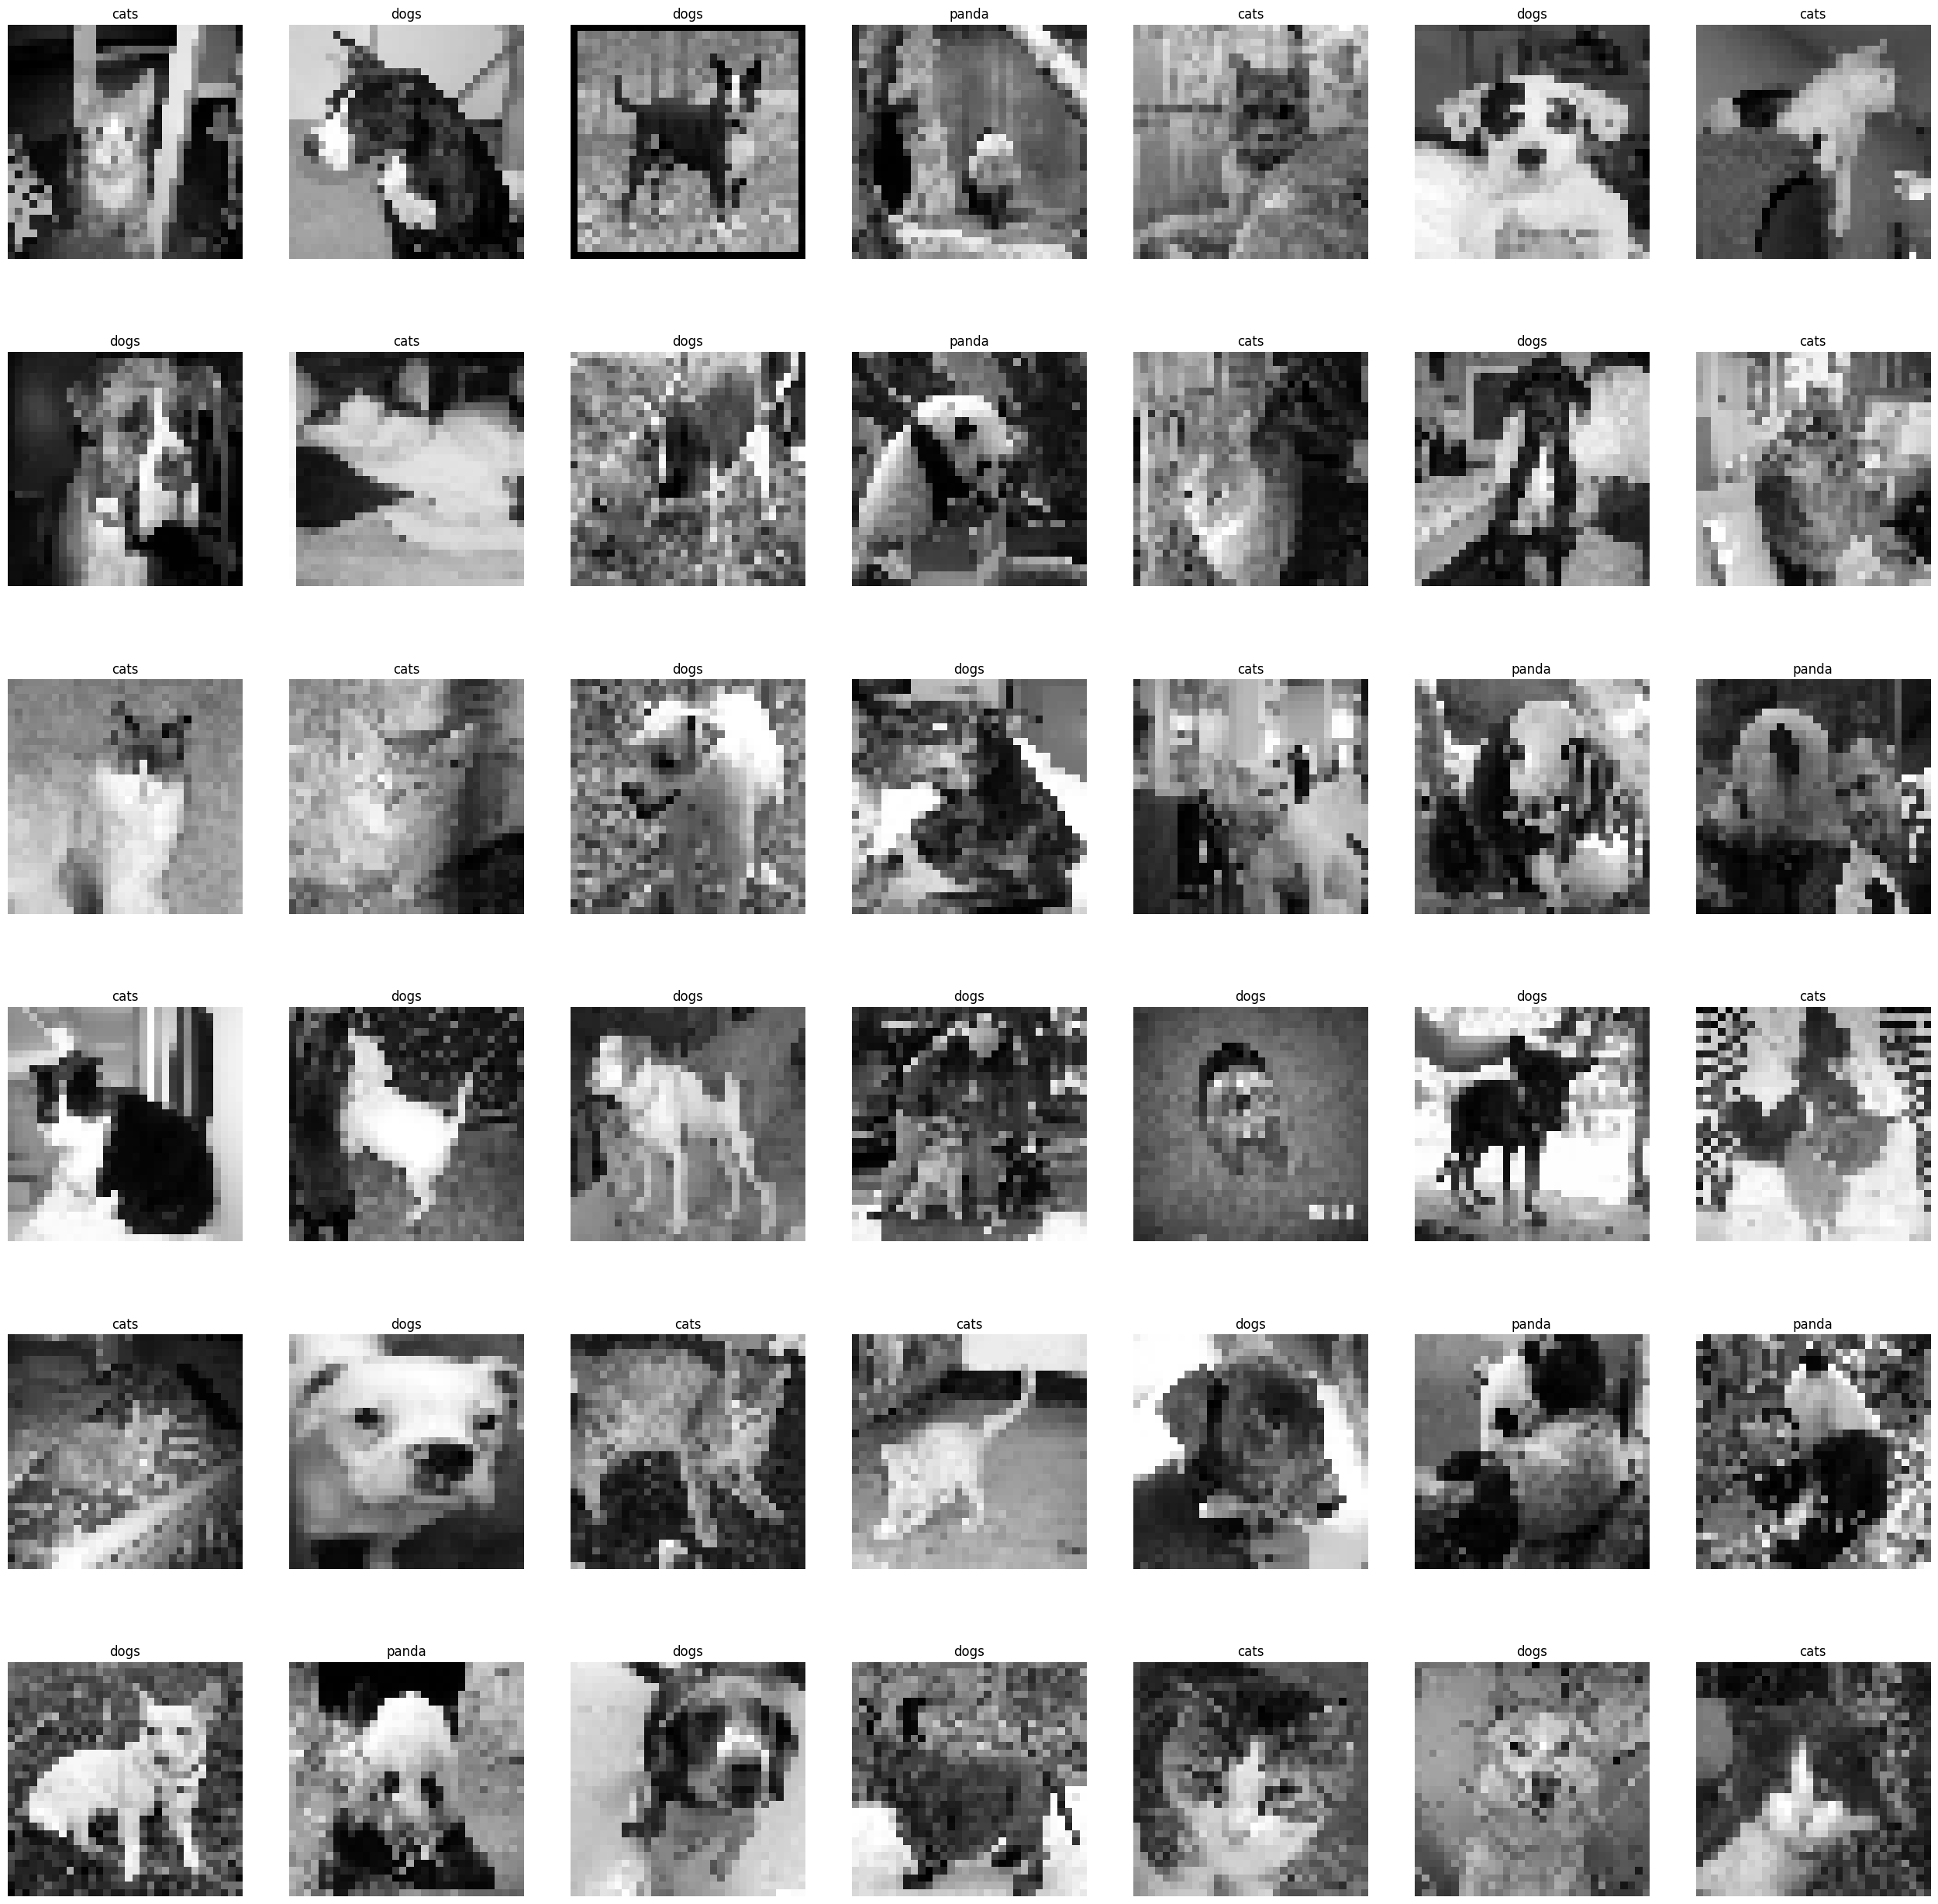

In [105]:
fig, axes = plt.subplots(6, 7, figsize=(32, 32))
label_names = ['dogs', 'panda', 'cats']
for (img_array, label), ax in zip(train_data, axes.flat):
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label_names[label])
    ax.axis('off')

plt.show()




# Cross-Validation


In [106]:
folds = [train_data[i::5] for i in range(5)]
len(folds)

5

In [107]:
for i, fold in enumerate(folds):
    labels = [label for _, label in fold]
    print(f"Fold {i+1}:")
    print(f"Labels: {labels}")
    print(f"Count: {len(fold)}")
    print(f" ")

Fold 1:
Labels: [2, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1]
Count: 60
 
Fold 2:
Labels: [0, 2, 2, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1]
Count: 60
 
Fold 3:
Labels: [0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0]
Count: 60
 
Fold 4:
Labels: [1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2]
Count: 60
 
Fold 5:
Labels: [2, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 0, 2, 

# Calculating Euclidean Distance

In [108]:
def l2_distance(valid_img, train_img):
    return np.sqrt(np.sum(np.square(valid_img - train_img)))

# Calculating Manhattan Distance

In [109]:
def l1_distance(valid_img, train_img):
    return np.sum(np.abs(valid_img - train_img))

# k-Nearest Neighbors (kNN) Prediction

In [110]:
def knn_prediction(distances, k=1):
    labels = []
    for i in range(k):
        _, label = distances[i]
        labels.append(label)


    label_freq = {}
    for label in labels:
        if label in label_freq:
            label_freq[label] += 1
        else:
            label_freq[label] = 1


    most_common_label = max(label_freq, key=label_freq.get)

    return most_common_label


# Euclidean Distance k-Nearest Neighbors (kNN) Cross-Validation with Accuracy

In [111]:
def evaluate_fold(train_set, valid_set, k):
    predictions = []
    for valid_img in valid_set:
        l2_distances = [
            (l2_distance(valid_img[0], train_img[0]), train_img[1])
            for train_img in train_set
        ]
        l2_distances.sort()
        predicted_label = knn_prediction(l2_distances, k)
        correct = int(predicted_label == valid_img[1])
        predictions.append(correct)
    return sum(predictions) / len(predictions)

def cross_validate_knn(folds, k_values):
    fold_accuracies_all = []
    avg_accuracies = []

    for k in k_values:
        print(f"Evaluating K = {k}")
        fold_accuracies = []

        for i in reversed(range(len(folds))):
            valid_set = folds[i]
            train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]
            accuracy = evaluate_fold(train_set, valid_set, k)
            fold_accuracies.append(accuracy)

        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        fold_accuracies_all.append(fold_accuracies)
        avg_accuracies.append(avg_accuracy)
        print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

    return fold_accuracies_all, avg_accuracies

k_range = range(1, 21)
fold_accuracies_2, avg_accuracies_2 = cross_validate_knn(folds, k_range)

print("Fold Accuracies:", fold_accuracies_2)
print("Average Fold Accuracies:", avg_accuracies_2)


Evaluating K = 1
K: 1 Average Accuracy: 0.43
Evaluating K = 2
K: 2 Average Accuracy: 0.43
Evaluating K = 3
K: 3 Average Accuracy: 0.42
Evaluating K = 4
K: 4 Average Accuracy: 0.46
Evaluating K = 5
K: 5 Average Accuracy: 0.46
Evaluating K = 6
K: 6 Average Accuracy: 0.48
Evaluating K = 7
K: 7 Average Accuracy: 0.47
Evaluating K = 8
K: 8 Average Accuracy: 0.46
Evaluating K = 9
K: 9 Average Accuracy: 0.46
Evaluating K = 10
K: 10 Average Accuracy: 0.48
Evaluating K = 11
K: 11 Average Accuracy: 0.45
Evaluating K = 12
K: 12 Average Accuracy: 0.48
Evaluating K = 13
K: 13 Average Accuracy: 0.49
Evaluating K = 14
K: 14 Average Accuracy: 0.48
Evaluating K = 15
K: 15 Average Accuracy: 0.51
Evaluating K = 16
K: 16 Average Accuracy: 0.50
Evaluating K = 17
K: 17 Average Accuracy: 0.50
Evaluating K = 18
K: 18 Average Accuracy: 0.50
Evaluating K = 19
K: 19 Average Accuracy: 0.50
Evaluating K = 20
K: 20 Average Accuracy: 0.50
Fold Accuracies: [[0.48333333333333334, 0.4166666666666667, 0.35, 0.45, 0.4666

# Manhattan Distance k-Nearest Neighbors (kNN) Cross-Validation with Accuracy

---



In [112]:
def evaluate_fold_l1(train_set, valid_set, k):
    predictions = []
    for valid_img in valid_set:
        distances = [
            (l1_distance(valid_img[0], train_img[0]), train_img[1])
            for train_img in train_set
        ]
        distances.sort()
        predicted_label = knn_prediction(distances, k)
        correct = int(predicted_label == valid_img[1])
        predictions.append(correct)
    return sum(predictions) / len(predictions)

def cross_validate_knn_l1(folds, k_values):
    fold_accuracies_all = []
    avg_accuracies = []

    for k in k_values:
        print(f"Evaluating K = {k}")
        fold_accuracies = []

        for i in reversed(range(len(folds))):
            valid_set = folds[i]
            train_set = [item for j, fold in enumerate(folds) if j != i for item in fold]
            accuracy = evaluate_fold_l1(train_set, valid_set, k)
            fold_accuracies.append(accuracy)

        avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
        fold_accuracies_all.append(fold_accuracies)
        avg_accuracies.append(avg_accuracy)
        print(f"K: {k} Average Accuracy: {avg_accuracy:.2f}")

    return fold_accuracies_all, avg_accuracies

k_range = range(1, 21)
fold_accuracies_1, avg_accuracies_1 = cross_validate_knn_l1(folds, k_range)

print("Fold Accuracies:", fold_accuracies_1)
print("Average Fold Accuracies:", avg_accuracies_1)


Evaluating K = 1
K: 1 Average Accuracy: 0.38
Evaluating K = 2
K: 2 Average Accuracy: 0.38
Evaluating K = 3
K: 3 Average Accuracy: 0.41
Evaluating K = 4
K: 4 Average Accuracy: 0.44
Evaluating K = 5
K: 5 Average Accuracy: 0.41
Evaluating K = 6
K: 6 Average Accuracy: 0.40
Evaluating K = 7
K: 7 Average Accuracy: 0.40
Evaluating K = 8
K: 8 Average Accuracy: 0.42
Evaluating K = 9
K: 9 Average Accuracy: 0.44
Evaluating K = 10
K: 10 Average Accuracy: 0.43
Evaluating K = 11
K: 11 Average Accuracy: 0.43
Evaluating K = 12
K: 12 Average Accuracy: 0.41
Evaluating K = 13
K: 13 Average Accuracy: 0.42
Evaluating K = 14
K: 14 Average Accuracy: 0.40
Evaluating K = 15
K: 15 Average Accuracy: 0.43
Evaluating K = 16
K: 16 Average Accuracy: 0.40
Evaluating K = 17
K: 17 Average Accuracy: 0.40
Evaluating K = 18
K: 18 Average Accuracy: 0.40
Evaluating K = 19
K: 19 Average Accuracy: 0.40
Evaluating K = 20
K: 20 Average Accuracy: 0.42
Fold Accuracies: [[0.48333333333333334, 0.3, 0.35, 0.4, 0.36666666666666664], 

# Visualizing Cross-validation Accuracy (Graph Implementation)

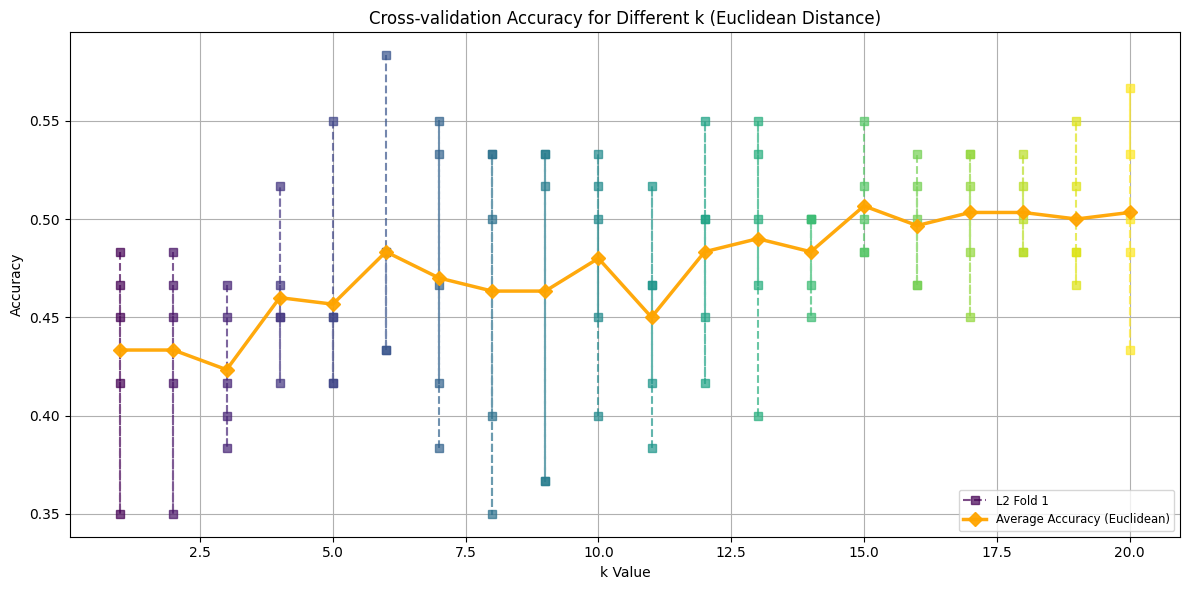

In [113]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
colors = plt.cm.viridis(np.linspace(0, 1, 20))

for k in range(20):
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2,
             linestyle='--', marker='s', markersize=6, alpha=0.7,
             color=colors[k],
             label=f'L2 Fold {k+1}' if k == 0 else "")

plt.plot(range(1, 21), avg_accuracies_2,
         color='orange', alpha=0.95,
         label='Average Accuracy (Euclidean)',
         linestyle='-', linewidth=2.5, marker='D', markersize=7)

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy for Different k (Euclidean Distance)')
plt.grid(True)
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()



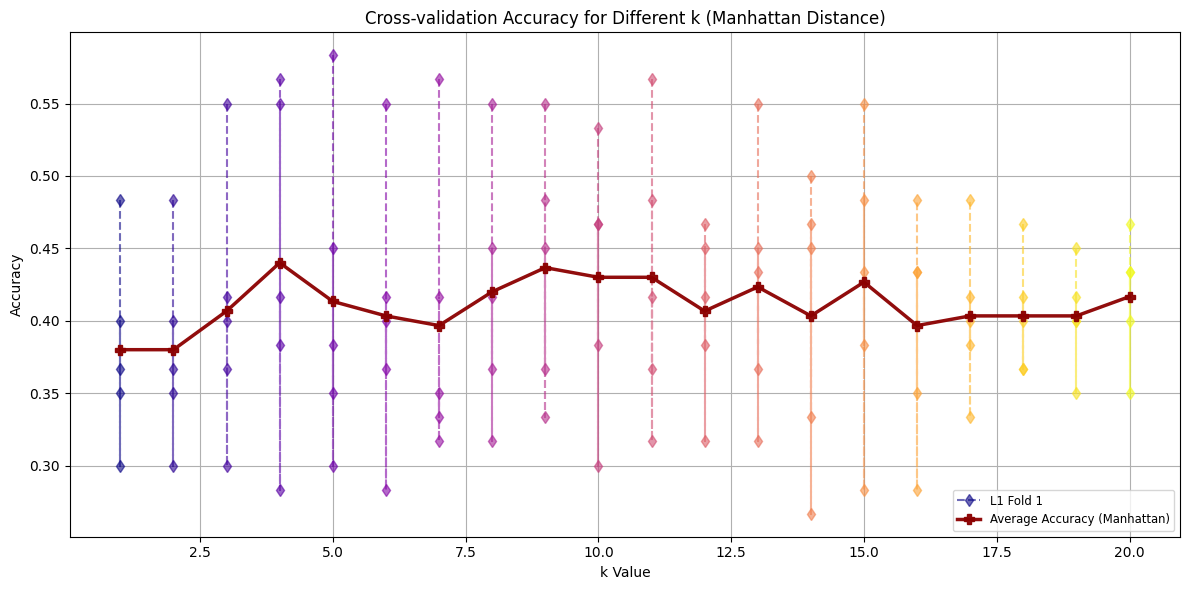

In [114]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
colors = plt.cm.plasma(np.linspace(0, 1, 20))

for k in range(20):
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1,
             linestyle='--', marker='d', markersize=6, alpha=0.6,
             color=colors[k],
             label=f'L1 Fold {k+1}' if k == 0 else "")

plt.plot(range(1, 21), avg_accuracies_1,
         color='darkred', alpha=0.95,
         label='Average Accuracy (Manhattan)',
         linestyle='-', linewidth=2.5, marker='P', markersize=7)

plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation Accuracy for Different k (Manhattan Distance)')
plt.grid(True)
plt.legend(loc='lower right', fontsize='small')
plt.tight_layout()
plt.show()



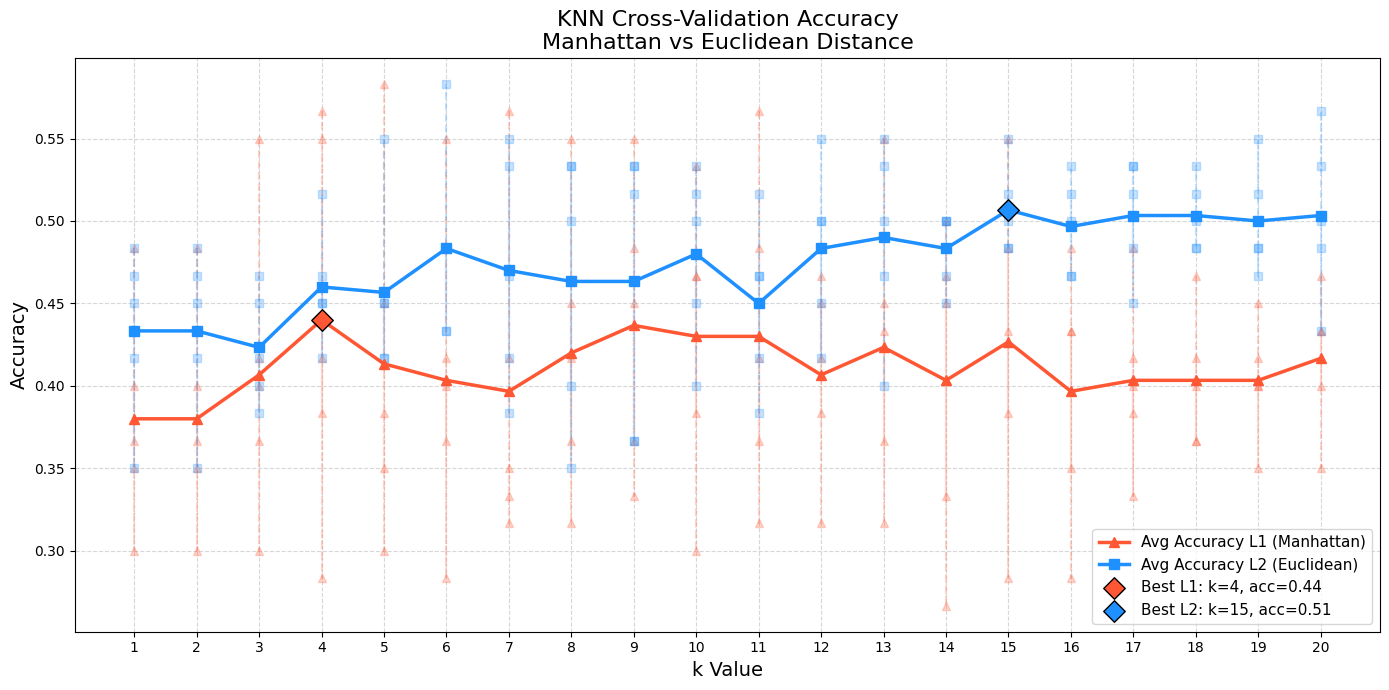

In [115]:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 7))

l1_color = '#FF5733'  # Manhattan
l2_color = '#1E90FF'  # Euclidean
fold_alpha = 0.25
avg_alpha = 0.95

# Fix: Both loops range over 20 k-values
for k in range(20):  # k from 1 to 20
    plt.plot([k + 1] * len(fold_accuracies_1[k]), fold_accuracies_1[k],
             linestyle='--', marker='^', alpha=fold_alpha,
             color=l1_color)

for k in range(20):  # k from 1 to 20
    plt.plot([k + 1] * len(fold_accuracies_2[k]), fold_accuracies_2[k],
             linestyle='--', marker='s', alpha=fold_alpha,
             color=l2_color)

# Plot average accuracies
plt.plot(range(1, 21), avg_accuracies_1,
         color=l1_color, linestyle='-', linewidth=2.5,
         marker='^', markersize=7, label='Avg Accuracy L1 (Manhattan)')

plt.plot(range(1, 21), avg_accuracies_2,
         color=l2_color, linestyle='-', linewidth=2.5,
         marker='s', markersize=7, label='Avg Accuracy L2 (Euclidean)')

# Best K values
best_k_l1 = np.argmax(avg_accuracies_1) + 1
best_acc_l1 = max(avg_accuracies_1)
plt.scatter(best_k_l1, best_acc_l1, color=l1_color, s=120, marker='D', edgecolors='black', zorder=5,
            label=f'Best L1: k={best_k_l1}, acc={best_acc_l1:.2f}')

best_k_l2 = np.argmax(avg_accuracies_2) + 1
best_acc_l2 = max(avg_accuracies_2)
plt.scatter(best_k_l2, best_acc_l2, color=l2_color, s=120, marker='D', edgecolors='black', zorder=5,
            label=f'Best L2: k={best_k_l2}, acc={best_acc_l2:.2f}')

# Labels and formatting
plt.xlabel('k Value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('KNN Cross-Validation Accuracy\nManhattan vs Euclidean Distance', fontsize=16)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(1, 21))  # Now showing 1 to 20
plt.legend(fontsize=11, loc='lower right')
plt.tight_layout()
plt.show()



# predictions Euclidean

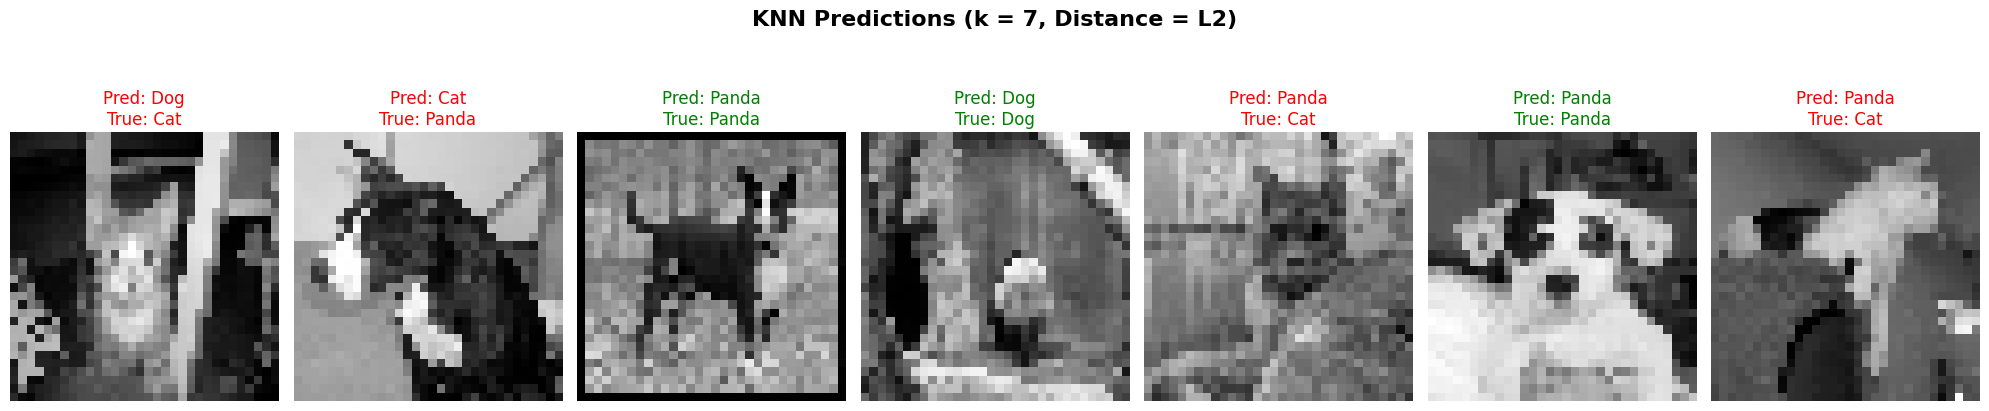

In [116]:
import matplotlib.pyplot as plt
import numpy as np

test_samples = train_data[:7]
k_best = 7
distance_function = l2_distance
label_names = ['Panda', 'Dog','Cat']

fig, axes = plt.subplots(1, len(test_samples), figsize=(20, 5))

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    color = 'green' if predicted_label == true_label else 'red'
    axes[idx].set_title(f"Pred: {label_names[predicted_label]}\nTrue: {label_names[true_label]}", color=color)
    axes[idx].axis('off')

plt.suptitle(f"KNN Predictions (k = {k_best}, Distance = {'L2' if distance_function == l2_distance else 'L1'})", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


#  predictions Manhattan

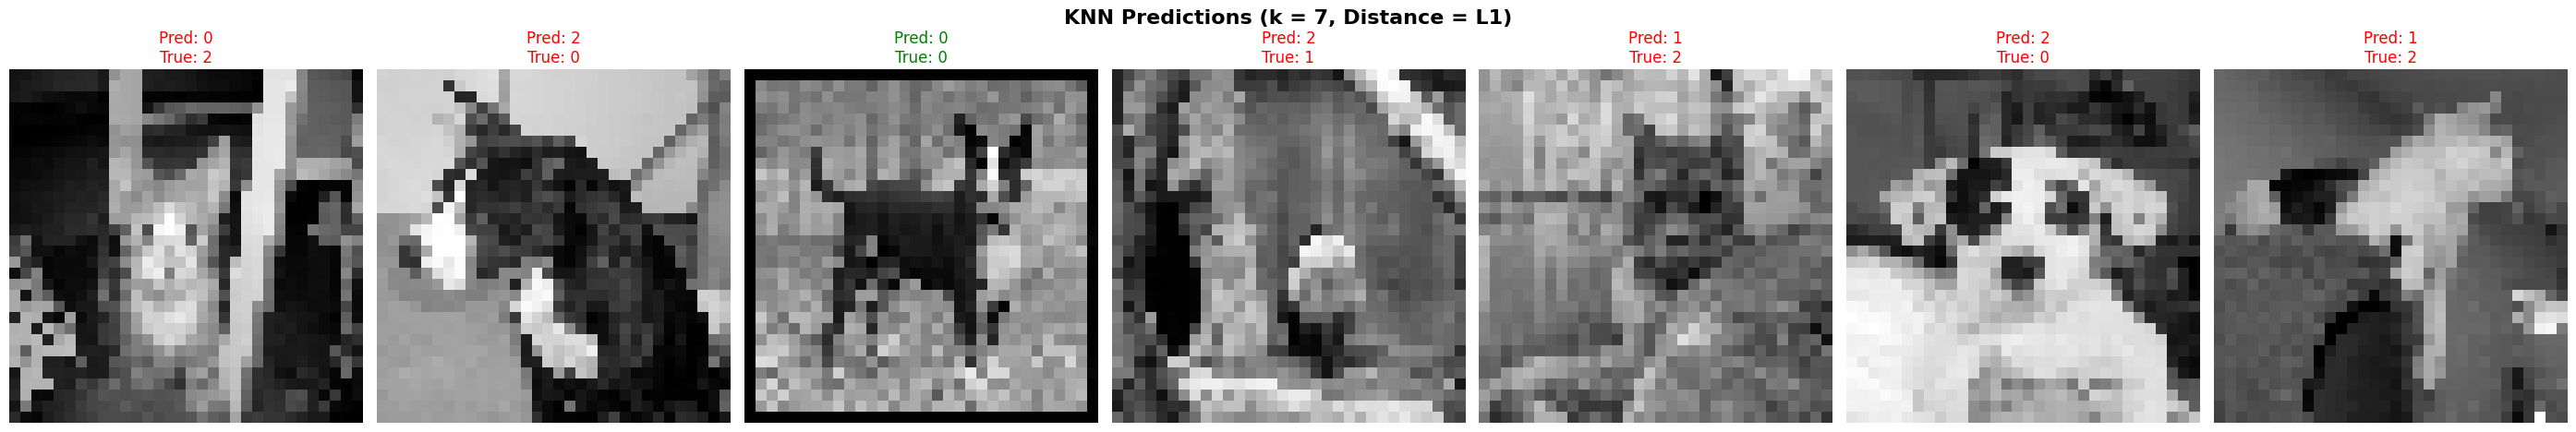

In [117]:
import matplotlib.pyplot as plt
import numpy as np

test_samples = train_data[:7]
k_best = 7
distance_function = l1_distance


fig, axes = plt.subplots(1, len(test_samples), figsize=(4 * len(test_samples), 5))

if len(test_samples) == 1:
    axes = [axes]

for idx, (test_img, true_label) in enumerate(test_samples):
    distances = []
    for train_img in train_data:
        if not np.array_equal(test_img, train_img[0]):
            dist = distance_function(test_img, train_img[0])
            distances.append((dist, train_img[1]))
    distances.sort()
    predicted_label = knn_prediction(distances, k_best)

    axes[idx].imshow(test_img, cmap='gray')
    axes[idx].set_title(f"Pred: {predicted_label}\nTrue: {true_label}",
                        color='green' if predicted_label == true_label else 'red')
    axes[idx].axis('off')

plt.suptitle(f"KNN Predictions (k = {k_best}, Distance = {'L2' if distance_function == l2_distance else 'L1'})",
             fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


# Discussion about the result
The comparative evaluation of Manhattan (L1) and Euclidean (L2) distance metrics in k-NN classification reveals notable performance differences over varying values of k. From the 5-fold cross-validation plot:

Euclidean distance (L2) achieves its highest average accuracy of 0.51 at
k=15.

Manhattan distance (L1) reaches its peak performance earlier, with a maximum accuracy of 0.44 at k=4.

These results suggest that Euclidean distance provides better generalization across the range of k values, especially for mid-range
k, whereas Manhattan distance performs relatively well at lower k but degrades as k increases.

This behavior is influenced by the nature of the grayscale 32×32 images used for classification (cats, dogs, and pandas). Euclidean distance, by squaring the differences, emphasizes larger pixel intensity gaps, which helps it capture subtle structural and textural variations across animal classes. This likely leads to better class separation as seen in the improved accuracy at higher
k values.

In contrast, Manhattan distance treats each pixel deviation uniformly. While this may provide robustness to noise at lower
k, it lacks the sensitivity to deeper image features, making it less effective as the neighborhood grows.

Additionally, the trend in the graph shows that:

Higher
k values help both metrics smooth out predictions and reduce overfitting.

However, only Euclidean distance continues to improve, suggesting it benefits more from neighborhood expansion.


Conclusion

While both distance metrics have their strengths, Euclidean distance is more suitable for image classification tasks involving fine-grained visual distinctions. For more robust and scalable performance, future improvements could include:

Dimensionality reduction (e.g., PCA).

Feature extraction using CNNs before applying k-NN.











